## **Project: Restaurant Recommendations**

In [1]:
## import the restaurant ratings data
import pandas as pd

restaurant_ratings = pd.read_excel('../Data/Restaurant_Ratings.xlsx',sheet_name='restaurant_ratings')

In [2]:
restaurant_ratings.head()

,Consumer_ID,Restaurant_ID,Restaurant_Name,Overall_Rating
0,U1077,135085,Tortas Locas Hipocampo,2
1,U1077,135038,Restaurant La Chalita,2
2,U1077,132825,Puesto De Tacos,2
3,U1077,135060,Restaurante Marisco Sam,1
4,U1068,135104,Vips,1


In [3]:
restaurant_ratings['Overall_Rating'].describe()

count    1161.000000
mean        1.199828
std         0.773282
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Overall_Rating, dtype: float64

In [4]:
## pivot the data into user-item matrix format (to be fitted into SVD)
X = restaurant_ratings.pivot(index='Consumer_ID', 
                             columns='Restaurant_Name',
                             values='Overall_Rating'
                            ).fillna(restaurant_ratings['Overall_Rating'].mean())

In [5]:
X.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,0.000000,1.199828,1.199828,1.199828
U1002,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.000000,1.199828,1.199828,1.199828
U1003,1.199828,1.199828,2.000000,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828
U1004,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,...,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828
U1005,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828


In [6]:
## Center the data around mean
X_centered = X - X.mean()

In [7]:
## Fit the data into SVD model with all features
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=len(X_centered.columns))
svd.fit(X_centered)

TruncatedSVD(n_components=127)

In [8]:
U = svd.transform(X_centered)

In [9]:
VT = svd.components_
VT

array([[ 1.60774489e-02,  2.94867946e-04,  9.90118969e-02, ...,
         1.05195416e-03,  1.40521987e-01,  1.36826071e-01],
       [-3.73219628e-02, -7.22603118e-05, -1.74001066e-01, ...,
        -2.33165679e-03,  1.90284955e-01, -2.87252379e-01],
       [-5.32562407e-03,  1.06180494e-03,  2.41707107e-01, ...,
         1.55706057e-02, -1.40112422e-01, -1.10328586e-01],
       ...,
       [ 4.68366577e-02, -5.48312821e-02,  1.00631764e-02, ...,
         8.57569717e-02,  3.69213655e-02,  1.07135161e-02],
       [-1.27424695e-02,  1.61733284e-02,  1.25718179e-03, ...,
        -2.29540133e-02,  4.28584784e-03,  6.53920963e-02],
       [-1.53911883e-03,  6.18758519e-01, -1.43309511e-04, ...,
        -9.24199429e-04, -1.60987843e-03, -3.45518725e-03]],
      shape=(127, 127))

In [10]:
## Calculate the cumulatative explained variance ratio
import numpy as np
cum_evr = np.cumsum(svd.explained_variance_ratio_)

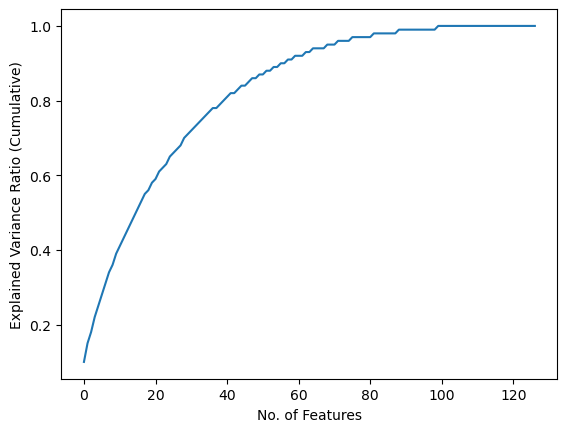

In [11]:
## Plot the cumulative variance ratio
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=cum_evr.round(2))
plt.xlabel('No. of Features')
plt.ylabel('Explained Variance Ratio (Cumulative)')
plt.show();


In [12]:
## Find the number of features that explaines the variance most
max_var = np.searchsorted(cum_evr,0.8,side='right') # Explains 90% of features
print(max_var)
svd_max = TruncatedSVD(n_components=max_var,random_state=42)
U_max = svd_max.fit_transform(X_centered)

39


In [13]:
sum(svd_max.explained_variance_ratio_)

np.float64(0.7929354778486423)

In [14]:
VT_max = svd_max.components_
U_max.shape, VT_max.shape

((138, 39), (39, 127))

In [15]:
U_max @ VT_max

array([[-9.36675423e-02,  9.77563906e-04,  5.09514953e-02, ...,
        -1.71321241e-02,  2.14119975e-02,  8.44764096e-02],
       [-1.78988828e-02,  1.49383385e-03, -2.98859772e-02, ...,
         7.84214479e-03, -1.66119210e-03,  7.54020684e-02],
       [ 1.37624430e-01,  2.27659858e-02,  7.41145363e-01, ...,
        -2.70458836e-02,  9.26580220e-02,  4.12280405e-04],
       ...,
       [ 6.71150803e-02,  2.06700984e-02, -2.32677400e-01, ...,
        -5.08590231e-02,  2.76673406e-03, -2.96073784e-02],
       [ 8.92093036e-02, -1.35730973e-02,  1.92839595e-01, ...,
         2.54579606e-02, -8.28395537e-03,  7.92698654e-01],
       [ 3.60021547e-02, -2.65024680e-04, -6.25884548e-02, ...,
        -1.95549940e-02,  9.22454113e-02,  1.71117200e-02]],
      shape=(138, 127))

In [16]:
## Introduce a new user
vector_length = X.shape[1]
new_user = np.full(vector_length,fill_value=np.nan)

## Populate with 2 ratings
ratings = [2,2]
cols_to_populate = [40,60]
new_user[cols_to_populate] = ratings

new_user_df = pd.DataFrame([new_user],columns=X.columns)

new_user_df = new_user_df.fillna(restaurant_ratings['Overall_Rating'].mean())
new_user_df = new_user_df - X.mean()

In [17]:
U_new_user = svd_max.transform(new_user_df)

In [18]:
U_new_user.shape

(1, 39)

In [19]:
VT_max.shape

(39, 127)

In [20]:
recs = pd.DataFrame((U_new_user @ VT_max).T, index=X.columns, columns=['Reco'])

## Drop restaurants that have already been rated by the user
already_rated_idx = np.where(~np.isnan(new_user))[0].tolist()

restaurants_to_be_removed = new_user_df.iloc[:,already_rated_idx]

In [21]:
## Drop rows with the restaurants already rated
top_recs = recs.drop(restaurants_to_be_removed.columns,axis=0)

In [22]:
top_recs = top_recs.sort_values('Reco',ascending=False).head(10)

In [23]:
top_recs

,Reco
Restaurant_Name,
Chilis Cuernavaca,0.128578
Restaurant And Bar And Clothesline Carlos N Charlies,0.123091
Potzocalli,0.112974
Restaurante Y Pescaderia Tampico,0.110460
Restaurant Teely,0.108032
Mariscos Tia Licha,0.089179
Vips,0.084374
Sirlone,0.064322
Chaires,0.055347


In [24]:
restaurant_details = pd.read_excel('../Data/Restaurant_Ratings.xlsx',sheet_name='restaurant_details')

In [25]:
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [26]:
top_recs_details = top_recs.merge(right=restaurant_details,
               how='left',
               left_on='Restaurant_Name',
               right_on='Name')[['Restaurant_ID','Name','Cuisine','Price','Franchise','Reco']]


In [27]:
top_recs_details['Restaurant_ID'] = top_recs_details['Restaurant_ID'].astype('int')

In [28]:
top_recs_details

,Restaurant_ID,Name,Cuisine,Price,Franchise,Reco
0,134987,Chilis Cuernavaca,NaN,Medium,No,0.128578
1,134983,Restaurant And Bar And Clothesline Carlos N Ch...,Bar,High,No,0.123091
2,135108,Potzocalli,NaN,Low,No,0.112974
3,135054,Restaurante Y Pescaderia Tampico,Seafood,High,No,0.110460
4,134992,Restaurant Teely,NaN,High,No,0.108032
5,132768,Mariscos Tia Licha,Family,Medium,Yes,0.089179
6,132951,Vips,American,Low,Yes,0.084374
7,132854,Sirlone,International,Medium,No,0.064322
8,132866,Chaires,Bakery,Medium,No,0.055347
9,135071,Restaurante La Cantina,Bar,Medium,No,0.048296


## **Content-Based Filtering to Suggest simialr Restaurants**

In [29]:
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [30]:
restaurant_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_ID  123 non-null    float64
 1   Name           127 non-null    object 
 2   Cuisine        90 non-null     object 
 3   Price          123 non-null    object 
 4   Franchise      123 non-null    object 
dtypes: float64(1), object(4)
memory usage: 5.1+ KB


In [32]:
## Convert the category columns to numeric
## Convert cusine into numeric columns
cuisine_num = pd.DataFrame(pd.get_dummies(restaurant_details['Cuisine'],dtype='int'))

In [33]:
## Convert Price (categorical column) into numeric
mapper = {
    'High':1,
    'Medium':0,
    'Low': -1
}

price_num = pd.DataFrame(
    restaurant_details['Price'].map(mapper),
    columns=['Price']
)

In [34]:
## Convert franchise column (categorical - Yes/ No) into numeric
franchise_num = pd.DataFrame(
    np.where(restaurant_details['Franchise']=='Yes',1,0),
    columns=['Franchise']
)

In [35]:
## Combine all the above into a df to be used for modelling
restaurant_details_df = pd.concat(
    [
        cuisine_num,
        price_num,
        franchise_num
    ],
    axis=1
).set_index(restaurant_details['Name'])

In [36]:
restaurant_details_df

,American,Armenian,Bakery,Bar,Breakfast,Brewery,Burgers,Cafeteria,Chinese,Coffee Shop,...,International,Italian,Japanese,Mexican,Pizzeria,Regional,Seafood,Vietnamese,Price,Franchise
Name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.0,0
Arrachela Grill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
Cabana Huasteca,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.0,0
Cafe Ambar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.0,0
Cafe Chaires,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tortas Hawaii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
Tortas Locas Hipocampo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
Tortas Y Hamburguesas El Gordo,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-1.0,0


In [44]:
restaurant_details_df = restaurant_details_df.dropna(axis=0,how='any')

In [47]:
## Fit cosine_similarity model and calculate cosine_similarity for restaurants
from sklearn.metrics.pairwise import cosine_similarity

cosine_matrix = cosine_similarity(restaurant_details_df)
cosine_df = pd.DataFrame(cosine_matrix,columns=restaurant_details_df.index, index=restaurant_details_df.index)

cosine_df.index.name = 'Name'

In [54]:
cosine_df = cosine_df.reset_index()

In [55]:
cosine_df.head()

Name,Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,Abondance Restaurante Bar,1.000000,0.0,0.0,0.707107,0.500000,0.000000,0.500000,0.000000,0.0,...,0.500000,0.500000,0.500000,0.408248,0.500000,0.0,0.0,0.500000,0.500000,0.408248
1,Arrachela Grill,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,Cabana Huasteca,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.707107,0.707107,0.707107,0.000000,0.707107,0.0,0.0,0.000000,0.000000,0.000000
3,Cafe Ambar,0.707107,0.0,0.0,1.000000,0.707107,0.000000,0.707107,0.000000,0.0,...,0.707107,0.707107,0.707107,0.577350,0.707107,0.0,0.0,0.707107,0.707107,0.577350
4,Cafe Chaires,0.500000,0.0,0.0,0.707107,1.000000,0.707107,1.000000,0.707107,0.0,...,0.500000,0.500000,0.500000,0.408248,0.500000,0.0,0.0,0.500000,0.500000,0.408248


In [58]:
kfc_recs = cosine_df[['Name','KFC']].sort_values(by='KFC',ascending=False).reset_index()

In [59]:
kfc_recs

Name,index,Name,KFC
0,122,Vips,1.000000
1,116,Tacos Los Volcanes,1.000000
2,57,McDonalds Centro,1.000000
3,37,KFC,1.000000
4,17,Dairy Queen,0.816497
...,...,...,...
118,94,Restaurante La Estrella De Dima,-0.577350
119,95,Restaurante La Gran Via,-0.577350
120,98,Restaurante Pueblo Bonito,-0.577350
121,81,Restaurant Teely,-0.577350


In [62]:
## Find the details of the restaurants
kfc_recs.merge(restaurant_details).drop(columns='index').set_index('Name')

,KFC,Restaurant_ID,Cuisine,Price,Franchise
Name,,,,,
Vips,1.000000,132951.0,American,Low,Yes
Tacos Los Volcanes,1.000000,132958.0,American,Low,Yes
McDonalds Centro,1.000000,132583.0,American,Low,Yes
KFC,1.000000,132851.0,American,Low,Yes
Dairy Queen,0.816497,132884.0,NaN,Low,Yes
...,...,...,...,...,...
Restaurante La Estrella De Dima,-0.577350,135050.0,NaN,High,No
Restaurante La Gran Via,-0.577350,135045.0,NaN,High,No
Restaurante Pueblo Bonito,-0.577350,135076.0,NaN,High,No


In [65]:
top_recs_details = top_recs_details.rename({'Reco':'Predicted_Rating'},axis=1)

In [66]:
top_recs_details

,Restaurant_ID,Name,Cuisine,Price,Franchise,Predicted_Rating
0,134987,Chilis Cuernavaca,NaN,Medium,No,0.128578
1,134983,Restaurant And Bar And Clothesline Carlos N Ch...,Bar,High,No,0.123091
2,135108,Potzocalli,NaN,Low,No,0.112974
3,135054,Restaurante Y Pescaderia Tampico,Seafood,High,No,0.110460
4,134992,Restaurant Teely,NaN,High,No,0.108032
5,132768,Mariscos Tia Licha,Family,Medium,Yes,0.089179
6,132951,Vips,American,Low,Yes,0.084374
7,132854,Sirlone,International,Medium,No,0.064322
8,132866,Chaires,Bakery,Medium,No,0.055347
9,135071,Restaurante La Cantina,Bar,Medium,No,0.048296
